In [1]:
import pandas as pd
import sqlite3

In [2]:
# Load the data
df = pd.read_excel("owid-co2-data.xlsx")

In [3]:
# Display the first few rows of the DataFrame
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Connect to the SQLite database
conn = sqlite3.connect('co2_data.db')

In [5]:
# Write the DataFrame to a SQLite table
df.to_sql('co2_data', conn, if_exists='replace', index=False)

In [6]:
# Query to examine trends in annual CO2 emissions
query1 = """
SELECT year, SUM(co2) AS total_co2_emissions
FROM co2_data
GROUP BY year
ORDER BY year;
"""

In [7]:
# Execute the query
result1 = pd.read_sql_query(query1, conn)
print(result1.head())

   year  total_co2_emissions
0  1750               55.836
1  1751               56.442
2  1752               57.030
3  1753               57.660
4  1754               58.404


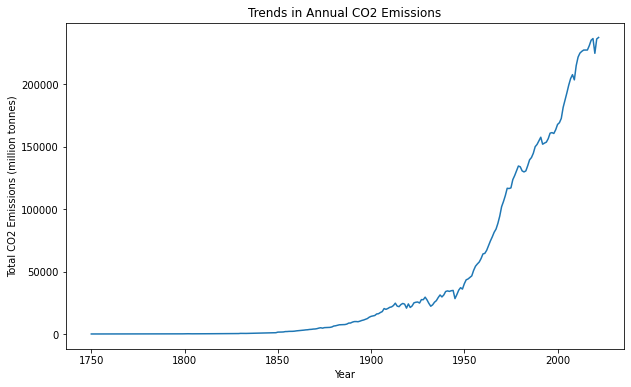

In [8]:
import matplotlib.pyplot as plt

# Plot trends in annual CO2 emissions
plt.figure(figsize=(10, 6)) 
plt.plot(result1['year'], result1['total_co2_emissions'])
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (million tonnes)')
plt.title('Trends in Annual CO2 Emissions')
plt.show()

In [9]:
# Query to analyze per capita emissions by countries in the last 10 years
query2 = """
SELECT country, AVG(co2_per_capita) AS avg_co2_per_capita_last_10_years
FROM (
    SELECT country, co2_per_capita
    FROM co2_data
    WHERE year >= (SELECT MAX(year) - 9 FROM co2_data) -- Filter data for the last 10 years
) AS recent_data
GROUP BY country
ORDER BY avg_co2_per_capita_last_10_years DESC;
"""

In [10]:
# Execute the query
result2 = pd.read_sql_query(query2, conn)
print(result2.head())

                country  avg_co2_per_capita_last_10_years
0                 Qatar                           37.5320
1   Trinidad and Tobago                           27.2169
2               Curacao                           24.7378
3  United Arab Emirates                           24.3315
4               Bahrain                           24.1151


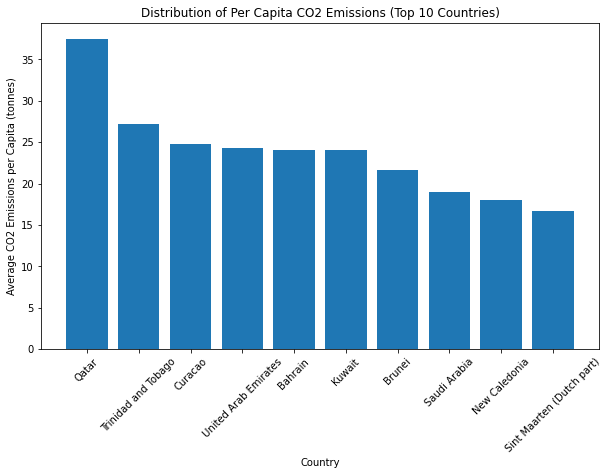

In [11]:
# Plot distribution of per capita emissions
plt.figure(figsize=(10, 6))
plt.bar(result2['country'][:10], result2['avg_co2_per_capita_last_10_years'][:10])
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions per Capita (tonnes)')
plt.title('Distribution of Per Capita CO2 Emissions (Top 10 Countries)')
plt.xticks(rotation=45)
plt.show()